In [1]:
import sys
sys.path.append(r'../')

from hao.Instruction_ViT import Instruction_ViT
# from data_ISIC import ISICDataModule
import hao.utils as u
from hao.CLIP import CLIP
import torch
from d2l import torch as d2l

In [2]:
img_size, patch_size, batch_size = 32, 8, 128
num_workers = 4
max_epochs = 20
use_bias = False
restart_train = True
gpu_idx = 0
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 128, 512, 4, 2
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.0001
last_model_path = r'Instruction_pth/last_model.pth'
best_model_path = r'Instruction_pth/best_model.pth'
categories = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
texts = [f'a photo of {c}' for c in categories]
num_classes = len(categories)


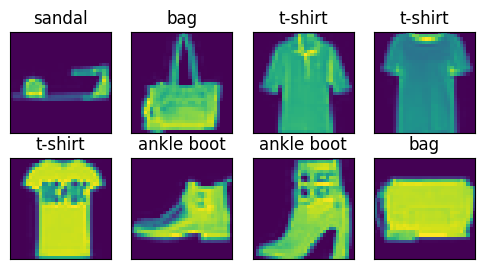

In [3]:
data = d2l.FashionMNIST(batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

In [4]:
model = Instruction_ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, texts, lr, use_bias, num_classes)
trainer = u.Trainer(max_epochs, last_model_path, best_model_path, restart_train, gpu_idx)
trainer.fit(model, data)

In [5]:
trainer.print_training_his(max_epochs)

Epoch 1 : train loss 1.7188 val loss 1.2842 val acc 70.88%
Epoch 2 : train loss 1.2741 val loss 1.1984 val acc 75.75%
Epoch 3 : train loss 1.2073 val loss 1.1598 val acc 78.61%
Epoch 4 : train loss 1.1756 val loss 1.1291 val acc 79.90%
Epoch 5 : train loss 1.1537 val loss 1.1138 val acc 80.99%
Epoch 6 : train loss 1.1355 val loss 1.1085 val acc 81.44%
Epoch 7 : train loss 1.1220 val loss 1.0988 val acc 82.61%
Epoch 8 : train loss 1.1103 val loss 1.0814 val acc 83.40%
Epoch 9 : train loss 1.1017 val loss 1.0906 val acc 82.58%
Epoch 10: train loss 1.0933 val loss 1.0697 val acc 84.00%
Epoch 11: train loss 1.0864 val loss 1.0395 val acc 84.09%
Epoch 12: train loss 1.0520 val loss 1.0322 val acc 84.16%
Epoch 13: train loss 1.0452 val loss 1.0235 val acc 84.66%
Epoch 14: train loss 1.0379 val loss 1.0194 val acc 84.87%
Epoch 15: train loss 1.0335 val loss 1.0187 val acc 84.73%
Epoch 16: train loss 1.0268 val loss 1.0159 val acc 84.76%
Epoch 17: train loss 1.0226 val loss 1.0168 val acc 85.1

In [6]:
model.board.data['train_loss'][4].y

1.314139924497686